In [1]:
import os
import sys

from glob import glob
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../chemical_properties_predictor'))
if module_path not in sys.path:
    sys.path.append(module_path)
import chemicalize_scraper as cs

%load_ext autoreload

In [71]:
zipped_directory = 'C:\\Users\\tatum\\Downloads\\calculation-result*.zip'
extraction_path = 'C:\\Users\\tatum\\Desktop\\unzipped_dirs\\'
database_path = '../data/Seran_chemicalize_database.xlsx'

In [80]:
%autoreload

#initialize extractor
extractor = cs.ChemicalizeExtractor(database_path)

#unzip all the downloaded files and saves uncompressed versions to Desktop
extractor.unzip_downloads(zipped_directory, extraction_path)

#load existing database xlsx file, extract files from new downloads and add unique molecules to database
extractor.extract()

C:\Users\tatum\Desktop\unzipped_dirs\20211006-113446\pKa.csv does not exist
C:\Users\tatum\Desktop\unzipped_dirs\20211006-113634\pKa.csv does not exist
C:\Users\tatum\Desktop\unzipped_dirs\20211006-113651\pKa.csv does not exist
C:\Users\tatum\Desktop\unzipped_dirs\20211006-113712\pKa.csv does not exist
C:\Users\tatum\Desktop\unzipped_dirs\20211006-113823\pKa.csv does not exist


In [81]:
db_df = pd.read_excel(database_path)
db_df

,Unnamed: 0,Molar mass,Molar mass Unit,Exact mass,Exact mass Unit,Formula,Formula Unit,Composition,Composition Unit,Lipinski's rule of five,...,cyclopropane,cyclopropene,furan,indane,indole,naphthalene,pyridine,pyrrole,thiophene,stereo_centers
0,0,532.680,g/mol,532.192646,Da,C24H32N6O4S2,NaN,"C (54.12%), H (6.06%), N (15.78%), O (12.01%),...",NaN,False,...,0,0,0,0,0,0,0,0,0,1
1,1,509.461,g/mol,509.136254,Da,C27H19F4N3O3,NaN,"C (63.65%), H (3.76%), F (14.92%), N (8.25%), ...",NaN,False,...,0,0,0,0,0,0,0,0,0,0
2,2,439.371,g/mol,439.126752,Da,C19H17F4N5O3,NaN,"C (51.94%), H (3.90%), F (17.30%), N (15.94%),...",NaN,True,...,0,0,0,0,0,0,0,0,0,1
3,3,457.361,g/mol,457.117330,Da,C19H16F5N5O3,NaN,"C (49.90%), H (3.53%), F (20.77%), N (15.31%),...",NaN,True,...,0,0,0,0,0,0,0,0,0,1
4,4,401.297,g/mol,401.091115,Da,C16H12F5N5O2,NaN,"C (47.89%), H (3.01%), F (23.67%), N (17.45%),...",NaN,True,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,142.158,g/mol,142.074228,Da,C6H10N2O2,NaN,"C (50.69%), H (7.09%), N (19.71%), O (22.51%)",NaN,True,...,0,0,0,0,0,0,0,0,0,1
80,80,452.467,g/mol,452.169585,Da,C23H24N4O6,NaN,"C (61.05%), H (5.35%), N (12.38%), O (21.22%)",NaN,True,...,0,0,0,0,0,0,0,0,0,1
81,81,167.190,g/mol,167.026566,Da,C5H5N5S,NaN,"C (35.92%), H (3.01%), N (41.89%), S (19.18%)",NaN,True,...,0,0,0,0,0,0,0,0,0,0
82,82,167.190,g/mol,167.026566,Da,C5H5N5S,NaN,"C (35.92%), H (3.01%), N (41.89%), S (19.18%)",NaN,True,...,0,0,0,0,0,0,0,0,0,0


In [4]:
%autoreload

#can also individually call extraction functions to troubleshoot/investigate
new_mol_df = extractor.extract_xlsx()
print(new_mol_df.columns)
new_mol_df.head()

Index(['Molar mass', 'Molar mass Unit', 'Exact mass', 'Exact mass Unit',
       'Formula', 'Formula Unit', 'Composition', 'Composition Unit',
       'Lipinski's rule of five', 'Lipinski's rule of five Unit',
       'Van der Waals volume', 'Van der Waals volume Unit',
       'Van der Waals surface area', 'Van der Waals surface area Unit',
       'Solvent accessible surface area',
       'Solvent accessible surface area Unit',
       'Topological polar surface area', 'Topological polar surface area Unit',
       'Minimum projection area', 'Minimum projection area Unit',
       'Maximum projection area', 'Maximum projection area Unit',
       'Minimum projection radius', 'Minimum projection radius Unit',
       'Maximum projection radius', 'Maximum projection radius Unit', 'HLB',
       'HLB Unit', 'logP', 'logP Unit', 'IUPAC name', 'IUPAC name Unit',
       'Traditional name', 'Traditional name Unit', 'Common names',
       'Common names Unit', 'SMILES', 'SMILES Unit', 'InChI', 'InChI Un

,Molar mass,Molar mass Unit,Exact mass,Exact mass Unit,Formula,Formula Unit,Composition,Composition Unit,Lipinski's rule of five,Lipinski's rule of five Unit,...,Hydrogen bond donor count,Hydrogen bond donor count Unit,Hydrogen bond acceptor count,Hydrogen bond acceptor count Unit,Formal charge,Formal charge Unit,Polarizability,Polarizability Unit,Molar refractivity,Molar refractivity Unit
0,532.68,g/mol,532.192645882,Da,C24H32N6O4S2,NaN,"C (54.12%), H (6.06%), N (15.78%), O (12.01%),...",NaN,false,NaN,...,4,NaN,6,NaN,0,NaN,55.1,A^3,138.62,cm^3/mol
1,509.461,g/mol,509.136254136,Da,C27H19F4N3O3,NaN,"C (63.65%), H (3.76%), F (14.92%), N (8.25%), ...",NaN,false,NaN,...,3,NaN,3,NaN,0,NaN,49.06,A^3,137.98,cm^3/mol


# TODO:

### Functions To Add:


### Updating Database:


### Excel Files:
 - pKa: Values can be taken from formulation_tools.xlsx, make sure to include columns for calculated and the occassional experimental pKa that clients supply
     - can also just save the array, like with LogD
 
 - isoelectric_point: Do we want anything from this? Only if there are multiple microspecies present in biological pH's. But %microspecies describes this better
 
 - logD: Get the whole array of data. logD is a function of pH
 
 - solubility: What media is the solubility for and is that important at all? We measure this anyways.. Aqueous Solubility predictor based on pH. Not needed
     
### Structural Files:
 - A structure .sdf file is created and stored in the zipped files. RDkit could open this and create a .png for files
 - May want to us RDkit to identify different functional groups for bool/int functional group columns
 - RDKit has tools to interface with Pandas dataframes
 
 __________________________________________

# Substructure Search Dev

### Notes:

 - RDkit interpretation of InChIs doesn't preserve stereochemistry and can have bad double-bonding assignment. Using Smiles preserves structure, can flip stereochemistry with implicit Hydrogens

In [5]:
db_df = pd.read_excel(database_path)
inchis = db_df['InChI'].tolist()
inchis[0]

'InChI=1/C24H32N6O4S2/c1-4-27-36(32,33)21-13-18(28-22-11-12-26-30-22)9-10-19(21)20-14-25-23(35-20)16-5-7-17(8-6-16)29-24(31)34-15(2)3/h9-17,27H,4-8H2,1-3H3,(H,29,31)(H2,26,28,30)/t16?,17-'

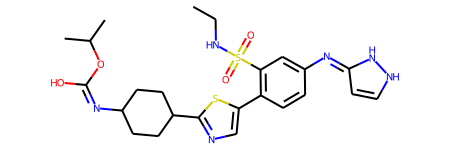

In [6]:
from rdkit import Chem

#molecule from inchi key
m = Chem.inchi.MolFromInchi(inchis[0])
m

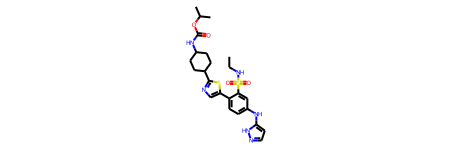

In [7]:
#mol from sdf file
from rdkit.Chem import PandasTools
m = PandasTools.LoadSDF(extraction_path+'20210928-150331\\structure.sdf')
m = m["ROMol"].tolist()
m = m[0]
m

CCNS(=O)(=O)C1=CC(NC2=CC=NN2)=CC=C1C1=CN=C(S1)C1CC[C@@H](CC1)NC(=O)OC(C)C


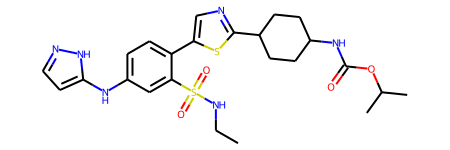

In [8]:
#mol from SMILES
smiles = db_df['SMILES'].tolist()
print(smiles[0])

m = Chem.MolFromSmiles(smiles[0])
m

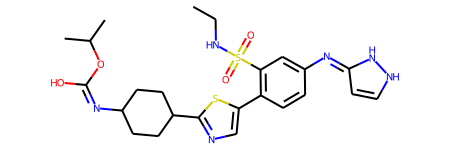

In [9]:
inchi = 'InChI=1/C24H32N6O4S2/c1-4-27-36(32,33)21-13-18(28-22-11-12-26-30-22)9-10-19(21)20-14-25-23(35-20)16-5-7-17(8-6-16)29-24(31)34-15(2)3/h9-17,27H,4-8H2,1-3H3,(H,29,31)(H2,26,28,30)/t16?,17-'

m = Chem.inchi.MolFromInchi(inchi)
m

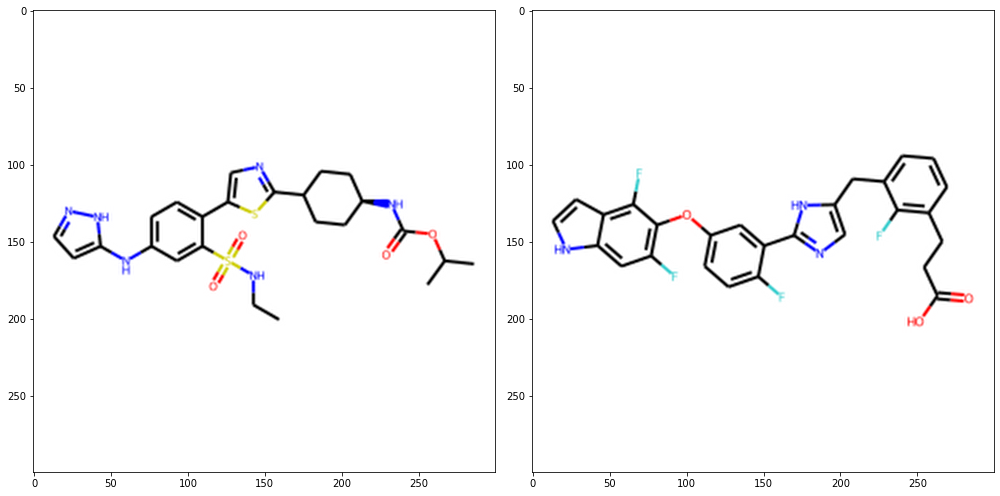

In [9]:
def draw_structure(mol_smiles_string, template_smiles_string, ax=None):
    if not ax:
        f, ax = plt.subplots()
        
    #generate image of molecule    
    m = Chem.MolFromSmiles(mol_smiles_string, sanitize=False)
    m.UpdatePropertyCache()
    Chem.SetHybridization(m)
    
    #generate sub-structure that is used for alignment
    t = Chem.MolFromSmiles(template_smiles_string, sanitize=False)
    t.UpdatePropertyCache()
    Chem.SetHybridization(t)
    Chem.AllChem.Compute2DCoords(t)
    
    #re-draw molecule using substructure alignment
    Chem.AllChem.GenerateDepictionMatching2DStructure(m, t)
    img = Chem.Draw.MolToImage(m)
    
    return ax.imshow(img, interpolation='bessel')

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
draw_structure(mol_smiles_string=smiles[0],
template_smiles_string=smiles[0], ax=ax1)
draw_structure(mol_smiles_string=smiles[1],
template_smiles_string=smiles[1], ax=ax2)
plt.tight_layout()
plt.show()

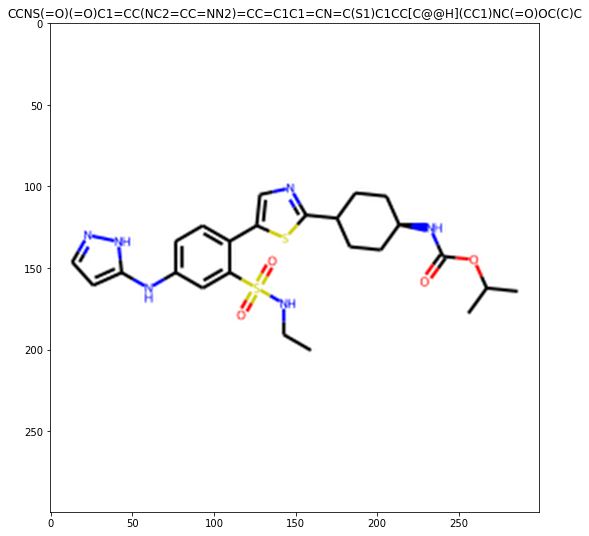

In [12]:
%autoreload

handler = cs.MolStructureHandler()

mol = handler.mol_from_smiles(smiles[0])
fig, ax = plt.subplots(figsize = (9, 9))
handler.draw_aligned_structure_from_smiles(smiles[0], ax = ax)
ax.set_title(smiles[0])
plt.show()

In [13]:
%autoreload

functional_group_counts = handler.get_functional_groups(mol)
functional_group_counts

{'amide': 1,
 'carboxylic acid': 1,
 'dimethyl ether': 1,
 'enamine': 6,
 'ethane': 11,
 'ethanol': 2,
 'ether': 1,
 'ester': 1,
 'formaldehyde': 1,
 'methane': 24,
 'methanethiol': 1,
 'phenyl': 1,
 'primary alcohol': 4,
 'primary amine': 6,
 'secondary amine': 5,
 'sulfoxide': 1,
 'thiol': 2}

In [14]:
%autoreload

ring_group_counts = handler.get_ring_groups(mol)
ring_group_counts

{'benzene': 1, 'benzene thiol': 1, 'cyclohexane': 1}

In [15]:
matches = Chem.FindPotentialStereo(mol)
for element in matches:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')


  Type: Atom_Tetrahedral, Which: 23, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 26, Specified: Unspecified, Descriptor: NoValue 


In [16]:
matches = Chem.FindMolChiralCenters(mol,force=True,includeUnassigned=True,useLegacyImplementation=False)
matches

[(23, '?'), (26, '?')]

[(26, 'Tet_CW')]
  Type: Atom_Tetrahedral, Which: 23, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 26, Specified: Specified, Descriptor: Tet_CW 


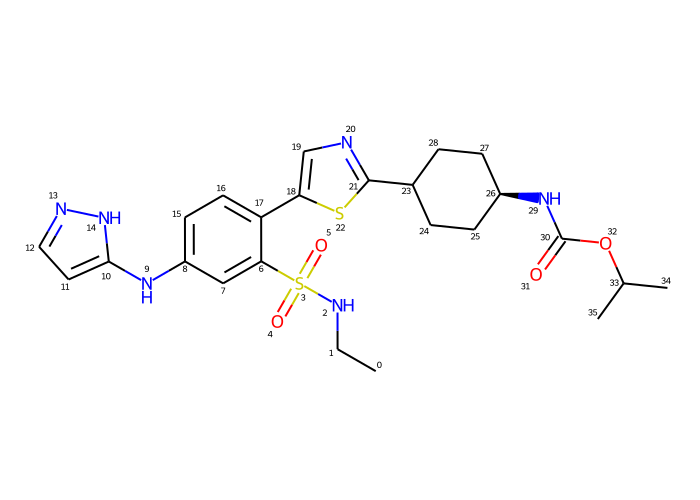

In [19]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 700, 500

#generate image of molecule    
m = Chem.MolFromSmiles(smiles[0], sanitize=False)
m.UpdatePropertyCache()
Chem.SetHybridization(m)

matches = Chem.FindMolChiralCenters(m, force=True, includeUnassigned=False, useLegacyImplementation=False)
print(matches)

matches = Chem.FindPotentialStereo(m)
for element in matches:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')
    
    
m

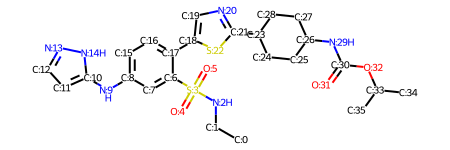

In [17]:
%autoreload

handler.numbered_strcture_from_smiles(smiles[0])

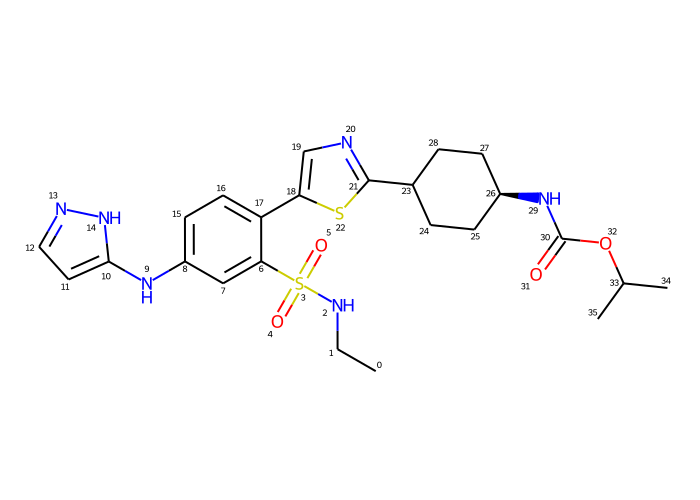

In [30]:
%autoreload

mol = handler.mol_from_smiles(smiles[0])

mol

In [31]:
chirals = handler.get_stereochemistry(mol)
print(chirals)

1


In [37]:
%autoreload

substructure_df = handler.extract_functional_groups(mol)
substructure_df = substructure_df[substructure_df != 0]
substructure_df = substructure_df.dropna(axis = 1)
substructure_df

,amide,but-1-ene,carboxylic acid,dimethyl ether,enamine,ethane,ethanethiol,ethanol,ethene,ether,...,methane,methanethiol,primary alcohol,primary amine,prop-1-ene,secondary amine,sulfoxide,thiol,cyclohexane,stereo_centers
0,1,2,1,1,6,15,3,2,5,1,...,24,3,4,6,9,7,1,2,1,1


In [60]:
%autoreload

#initialize extractor
extractor = cs.ChemicalizeExtractor(database_path)

#unzip all the downloaded files and saves uncompressed versions to Desktop
extractor.unzip_downloads(zipped_directory, extraction_path)

new_xl_df = extractor.extract_xlsx()

ph_dep_df = extractor.extract_xl_arrays()
ph_dep_df

,logD,number_of_microspecies,pH_dependent_microspecies,pH_vals
0,"[-0.6339, -0.6185, -0.5998, -0.5772, -0.5501, ...",8.0,"[[0.0%, 0.0%, 0.1%, 0.0%, 99.9%, 0.0%, 0.0%, 0...","[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ..."
1,"[4.9134, 4.9134, 4.9134, 4.9134, 4.9134, 4.913...",5.0,"[[0.0%, 0.0%, 100.0%, 0.0%, 0.0%], [0.0%, 0.0%...","[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ..."
